### Titanic Dataset Project

- The sinking of the Titanic is one of the most infamous shipwrecks in history.

- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

| Variable | Definition |
| :- | -: |
| survival | Survival status |
| pclass | Ticket class |
| sex | Gender |
| Age | Age in years |
| sibsp | number of siblings / spouses aboard the Titanic |
| parch | number of parents / children aboard the Titanic |
| ticket | Ticket number |
| fare | Passenger fee |
| cabin | Cabin number |
| embarked | Port of Embarkation |

In [1]:
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=Warning)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

In [8]:
df = pd.read_csv("titanic.csv")

## Exploratory Data Analysis

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **891 rows**
- **12 columns-features**

In [10]:
df.shape

(891, 12)

All features are encoded with proper dtypes.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### In "Sex", "Cabin" and "Embarked" features we have missing values. If we compare to whole dataset we can see that "Cabin" feature has most missing values ratio.

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- #### In "Age" and "Fare" features, we have some suspicious situations in last quartes. %75 is 38 but %100 is 80 so might have outliers for "Age". So I wanted to check more detailed quartiles.

In [14]:
df.describe([0, 0.05, 0.50, 0.95, 0.99]).T

,count,mean,std,min,0%,5%,50%,95%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,1.00,45.500,446.0000,846.50000,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.00,0.000,0.0000,1.00000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.00,1.000,3.0000,3.00000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,0.42,4.000,28.0000,56.00000,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.00,0.000,0.0000,3.00000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.00,0.000,0.0000,2.00000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,0.00,7.225,14.4542,112.07915,249.00622,512.3292


- #### It seems more appropriate right now but right now I think we have outliers again.

### For ease of next processes, we can separate our features by dtypes.

In [15]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

In [16]:
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [17]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and \
              df[col].dtypes != "O"]

In [18]:
num_but_cat

['Survived', 'Pclass', 'SibSp', 'Parch']

In [19]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and \
              df[col].dtypes == "O"]

In [20]:
cat_but_car

['Name', 'Ticket', 'Cabin']

In [21]:
cat_cols = cat_cols + num_but_cat

In [22]:
cat_cols

['Name',
 'Sex',
 'Ticket',
 'Cabin',
 'Embarked',
 'Survived',
 'Pclass',
 'SibSp',
 'Parch']

In [23]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [24]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [25]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [26]:
num_cols = [col for col in num_cols if col not in num_but_cat]

In [27]:
num_cols

['PassengerId', 'Age', 'Fare']

In [28]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [29]:
num_cols

['Age', 'Fare']

- #### Checking class counts and ratios in features.

In [30]:
for col in cat_cols:
    print(pd.DataFrame({col: df[col].value_counts(),
                       "Ratio": 100 * df[col].value_counts() / len(df)}))

        Sex      Ratio
Sex                   
male    577  64.758698
female  314  35.241302
          Embarked      Ratio
Embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
          Survived      Ratio
Survived                     
0              549  61.616162
1              342  38.383838
        Pclass      Ratio
Pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954
       SibSp      Ratio
SibSp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167
       Parch      Ratio
Parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233


- ### More than half of the passengers on the ship did not survive. 
- Want to see it more easy.

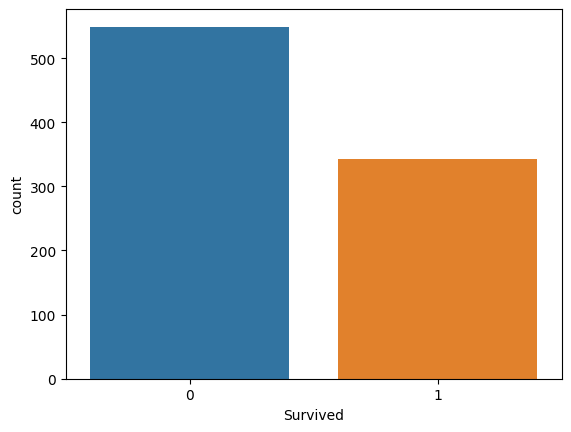

In [31]:
sns.countplot(x = df["Survived"], data = df)
plt.show()

In [32]:
quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

In [33]:
num_cols

['Age', 'Fare']

In [34]:
df["Age"].describe(quantiles)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64

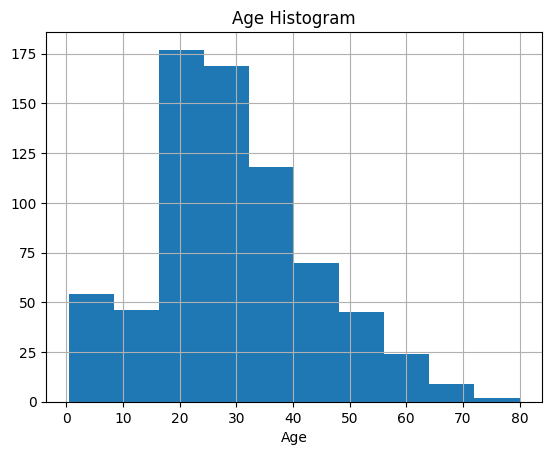

In [35]:
df["Age"].hist()

plt.xlabel("Age")
plt.title("Age Histogram")
plt.show()

In [36]:
df["Fare"].describe(quantiles)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64

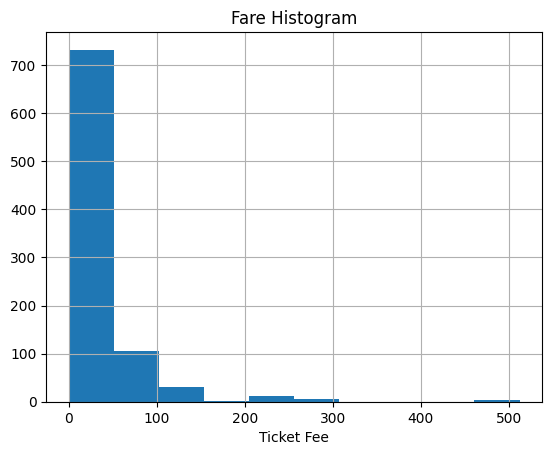

In [37]:
df["Fare"].hist()

plt.xlabel("Ticket Fee")
plt.title("Fare Histogram")
plt.show()

#### There are some people who did not pay anything to travel with ship. Its suspicious but maybe they are crew members.

In [38]:
for col in cat_cols:
    print(pd.DataFrame({"Target_Mean": df.groupby(col)["Survived"].mean()}), end="\n\n\n")

        Target_Mean
Sex                
female     0.742038
male       0.188908


          Target_Mean
Embarked             
C            0.553571
Q            0.389610
S            0.336957


          Target_Mean
Survived             
0                 0.0
1                 1.0


        Target_Mean
Pclass             
1          0.629630
2          0.472826
3          0.242363


       Target_Mean
SibSp             
0         0.345395
1         0.535885
2         0.464286
3         0.250000
4         0.166667
5         0.000000
8         0.000000


       Target_Mean
Parch             
0         0.343658
1         0.550847
2         0.500000
3         0.600000
4         0.000000
5         0.200000
6         0.000000




- #### Females tend to survive more than men.
- #### Boarding from port C halfed the survival rate.
- #### Travel class affected survival. We could also understand this information intuitively. We confirmed it.
- #### 1 to 3 close relatives changed the survival rate to tending to survive more.


In [39]:
for col in num_cols:
    print(pd.DataFrame(df.groupby("Survived").agg({col:"mean"})), end="\n\n\n")

                Age
Survived           
0         30.626179
1         28.343690


               Fare
Survived           
0         22.117887
1         48.395408




- #### Age of survivers around the 28 maybe its because they prioritize woman and children. We saw that in gender survival ratio.
- #### It is like understandable more intuitively but we can see that paying more money changed the survival ratio.

In [40]:
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

- ### We know that we have some missing values but let's check it out thir affection in survival rate.

In [41]:
na_cols = df.isnull().sum().sort_values(ascending = False).index[0:3]

In [42]:
na_cols

Index(['Cabin', 'Age', 'Embarked'], dtype='object')

In [43]:
temp_df = df.copy()

In [44]:
for col in na_cols:
    temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

In [45]:
na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

In [46]:
for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)["Survived"].mean(),
                            "Count": temp_df.groupby(col)["Survived"].count()}), end="\n\n\n")

               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2




- #### Having cabin number changed drastically survival rate who have a cabin number compare to who don't. Maybe we can create one feature about that because it won't change anything by itself.

## Feature Extraction

In [47]:
df.columns = [col.upper() for col in df.columns]

In [48]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* #### As we discussed, this variable is expressed as 1 for those with a cabin number and 0 for those without.

In [49]:
df["NEW_CABIN_CHECK"] = df["CABIN"].notnull().astype("int")

* #### The name letter count variable is a variable that specifies the number of letters in the name. It is derived from the relationship between name length and reputation.

In [50]:
df["NEW_NAME_COUNT"] = df["NAME"].str.len()

* ####  Can be applied same idea to word count.

In [51]:
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))

* #### Also can we extract some special titles like Doctor?

In [52]:
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

* #### Maybe we should see all titles.

In [53]:
df["NEW_TITLE"] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand = False)

* #### We saw that survival rate affected by number of relatives so how many people are we on board per family?

In [54]:
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1

* #### It's a intuitive approach but maybe age with travel class can tell us about something like young age with money or maturenes with low money.

In [55]:
df["NEW_AGE_PCLASS"] = df["AGE"] + df["PCLASS"]

* #### Created a numeric variable but we can do that for categorical type too.

In [56]:
df.loc[(df["SIBSP"] + df["PARCH"]) > 0, "NEW_IS_ALONE"] = "no"

In [57]:
df.loc[(df["SIBSP"] + df["PARCH"]) == 0, "NEW_IS_ALONE"] = "yes"

* #### We can seperate the "AGE" variable more deep like describing sensitive classes.

In [58]:
df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df['AGE'] >= 18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = 'mature'
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"

* #### Also, adding gender breakthrough.

In [59]:
df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"] = "maturemale"

In [60]:
df.loc[(df["SEX"] == "male") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniorfemale"

In [61]:
df.shape

(891, 22)

In [62]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_CHECK,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,23,4,0,Mr,2,25.0,no,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,51,7,0,Mrs,2,39.0,no,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,3,0,Miss,1,29.0,yes,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,44,7,0,Mrs,2,36.0,no,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,24,4,0,Mr,1,38.0,yes,mature,maturemale


In [63]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

In [64]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and \
              df[col].dtypes != "O"]

In [65]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and \
              df[col].dtypes == "O"]

In [66]:
cat_cols = cat_cols + num_but_cat

In [67]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [68]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [69]:
num_cols = [col for col in num_cols if col not in num_but_cat]

In [70]:
num_cols = [col for col in num_cols if col not in "PASSENGERID"]

In [71]:
cat_cols

['SEX',
 'EMBARKED',
 'NEW_TITLE',
 'NEW_IS_ALONE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT',
 'SURVIVED',
 'PCLASS',
 'SIBSP',
 'PARCH',
 'NEW_CABIN_CHECK',
 'NEW_NAME_WORD_COUNT',
 'NEW_NAME_DR',
 'NEW_FAMILY_SIZE']

In [72]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

## OUTLIERS

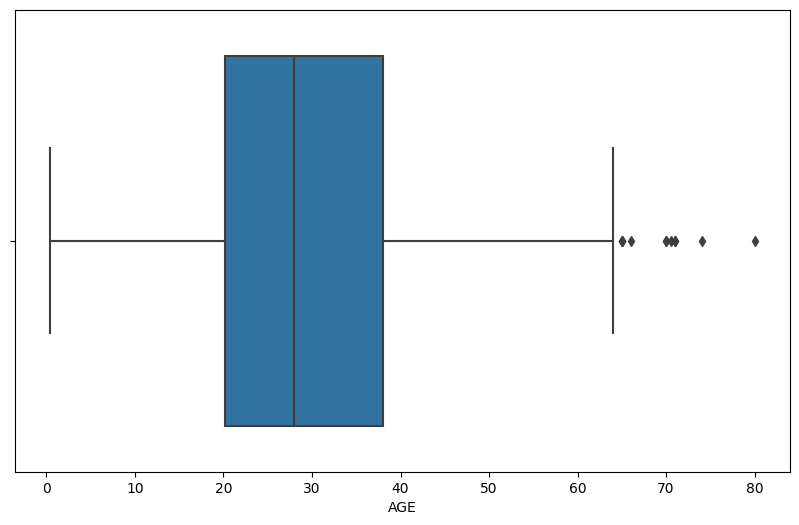

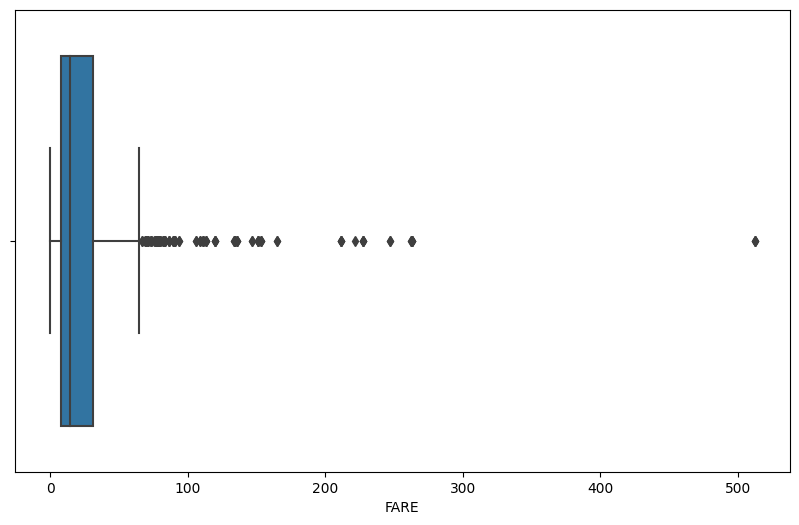

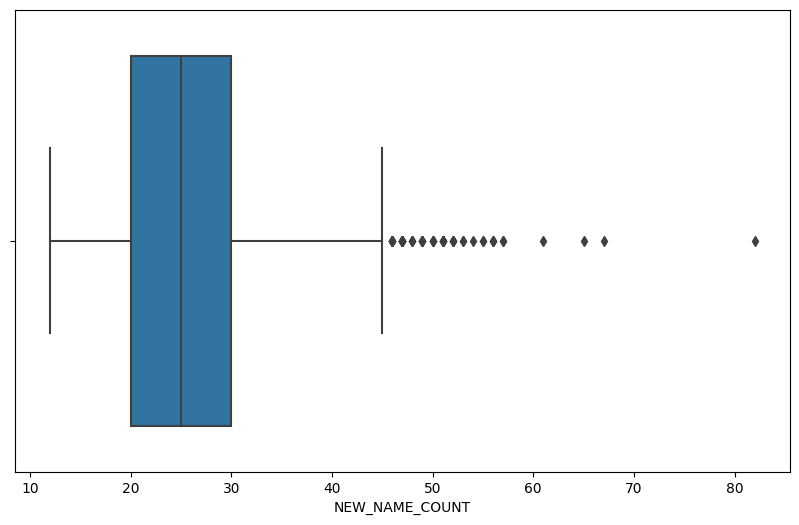

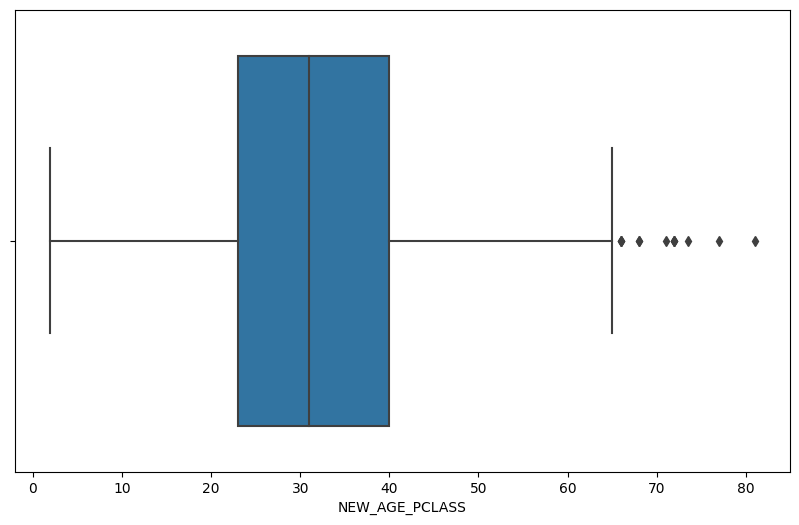

In [73]:
for col in num_cols:
    plt.figure(figsize = (10, 6))
    sns.boxplot(x = df[col])
    plt.show()

In [74]:
def outlier_thresholds(dataframe, col_name, q1 = 0.05, q3 = 0.95):
    quartile1 = dataframe[col_name].quantile(0.05)
    quartile3 = dataframe[col_name].quantile(0.95)
    iqr = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    return low_limit, up_limit

In [75]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [76]:
for col in num_cols:
    outlier_thresholds(df, col)

In [77]:
for col in num_cols:
    replace_with_thresholds(df, col)

* #### We may have outliers from the boxplots, but we must be careful when processing them.
* #### That's why, going to cut them by their edges in %5-%95 quartiles.

### MISSING VALUES

In [78]:
df.isnull().sum().sort_values(ascending = False)

CABIN                  687
NEW_SEX_CAT            177
AGE                    177
NEW_AGE_CAT            177
NEW_AGE_PCLASS         177
EMBARKED                 2
SIBSP                    0
PARCH                    0
TICKET                   0
FARE                     0
SEX                      0
SURVIVED                 0
NEW_CABIN_CHECK          0
NEW_NAME_COUNT           0
NEW_NAME_WORD_COUNT      0
NEW_NAME_DR              0
NEW_TITLE                0
NEW_FAMILY_SIZE          0
NAME                     0
NEW_IS_ALONE             0
PCLASS                   0
PASSENGERID              0
dtype: int64

- #### Created more usable feature from "Cabin" feature so we don't have to use it.

In [79]:
df.drop("CABIN", axis = 1, inplace = True)

- #### Extracted "Ticket" and "Name" features. Don't need them.

In [80]:
df.drop(["TICKET", "NAME"], axis = 1, inplace = True)

### We know, we have outliers in "Age"  variable. In order to not affect the distribution, going to impute them with median.

In [81]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

- #### Extracted variables from "Age" variable affected by missing values in "Age" variable so we can create them again with imputed "Age" variable.

In [82]:
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

In [83]:
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

In [84]:
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [85]:
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'

#### Had 2 missing values in port location variable, it make sense thinking these 2 variables may suit to most recurring class.

In [86]:
df["EMBARKED"] = df["EMBARKED"].fillna(df["EMBARKED"].mode()[0])

- ### All clean. 

In [87]:
df.isnull().sum().sort_values(ascending = False)

PASSENGERID            0
NEW_NAME_COUNT         0
NEW_AGE_CAT            0
NEW_IS_ALONE           0
NEW_AGE_PCLASS         0
NEW_FAMILY_SIZE        0
NEW_TITLE              0
NEW_NAME_DR            0
NEW_NAME_WORD_COUNT    0
NEW_CABIN_CHECK        0
SURVIVED               0
EMBARKED               0
FARE                   0
PARCH                  0
SIBSP                  0
AGE                    0
SEX                    0
PCLASS                 0
NEW_SEX_CAT            0
dtype: int64

In [88]:
cat_cols

['SEX',
 'EMBARKED',
 'NEW_TITLE',
 'NEW_IS_ALONE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT',
 'SURVIVED',
 'PCLASS',
 'SIBSP',
 'PARCH',
 'NEW_CABIN_CHECK',
 'NEW_NAME_WORD_COUNT',
 'NEW_NAME_DR',
 'NEW_FAMILY_SIZE']

## ENCODING

In [89]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [90]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

- #### Created some variable which have so many classes in it but we have low amount of data so some classes maybe don't take any information in it. Gonna check that.

In [91]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
        COUNT     RATIO  TARGET_MEAN
SEX                                 
female    314  0.352413     0.742038
male      577  0.647587     0.188908


EMBARKED : 3
          COUNT     RATIO  TARGET_MEAN
EMBARKED                              
C           168  0.188552     0.553571
Q            77  0.086420     0.389610
S           646  0.725028     0.339009


NEW_TITLE : 17
           COUNT     RATIO  TARGET_MEAN
NEW_TITLE                              
Capt           1  0.001122     0.000000
Col            2  0.002245     0.500000
Countess       1  0.001122     1.000000
Don            1  0.001122     0.000000
Dr             7  0.007856     0.428571
Jonkheer       1  0.001122     0.000000
Lady           1  0.001122     1.000000
Major          2  0.002245     0.500000
Master        40  0.044893     0.575000
Miss         182  0.204265     0.697802
Mlle           2  0.002245     1.000000
Mme            1  0.001122     1.000000
Mr           517  0.580247     0.156673
Mrs          125 

- #### In some variables classes have lower amount of information. Thinking of merging these classes with defined threshold like %1

In [92]:
df = rare_encoder(df, 0.01)

- #### Checking result in title variable.

In [93]:
df["NEW_TITLE"].value_counts()

NEW_TITLE
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

In [94]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

- #### Goint to use decision tree based algorithm which optimized with gradient descent algorithm so gradient descent is distance based optimization algorithm we need to scale and encode our variables.

In [95]:
df_encoded = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [96]:
df_encoded.head()

,PASSENGERID,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS,SEX_male,EMBARKED_Q,EMBARKED_S,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_IS_ALONE_yes,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale,SURVIVED_1,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,NEW_CABIN_CHECK_1,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_NAME_DR_1,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11
0,1,22.0,7.2500,23.0,66.0,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2,38.0,71.2833,51.0,38.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
2,3,26.0,7.9250,22.0,78.0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,35.0,53.1000,44.0,35.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,5,35.0,8.0500,24.0,105.0,True,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- #### Used one-hot encoding for both binary and multi classed variable with adjusted drop_first argument.

In [97]:
from sklearn.preprocessing import RobustScaler

In [98]:
rs = RobustScaler()

In [99]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [100]:
df_encoded[num_cols] = rs.fit_transform(df_encoded[num_cols])

- #### Saw that we have outliers and applied edge cutting processes so we know that we still have some outliers.
- #### Used edge cutting process because removing tham causes loss of information and imputing them was going to change distribution.
- #### So we can use Robust Scaler in order to not affect much by outliers. It uses median and iqr ranges

In [101]:
df_encoded.head()

,PASSENGERID,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS,SEX_male,EMBARKED_Q,EMBARKED_S,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_IS_ALONE_yes,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale,SURVIVED_1,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,NEW_CABIN_CHECK_1,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_NAME_DR_1,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11
0,1,-0.571429,-0.312011,-0.2,0.08,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2,0.571429,2.461242,2.6,-0.48,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
2,3,-0.285714,-0.282777,-0.3,0.32,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,0.357143,1.673732,1.9,-0.54,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,5,0.357143,-0.277363,-0.1,0.86,True,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
cat_cols = [col for col in df_encoded.columns if df_encoded[col].dtypes == "O"]
num_but_cat = [col for col in df_encoded.columns if df_encoded[col].nunique() < 10 and \
              df_encoded[col].dtypes != "O"]
cat_but_car = [col for col in df_encoded.columns if df_encoded[col].nunique() > 20 and \
              df_encoded[col].dtypes == "O"]
cat_cols = cat_cols + num_but_cat

cat_cols = [col for col in cat_cols if col not in cat_but_car]
num_cols = [col for col in df_encoded.columns if df_encoded[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]

num_cols = [col for col in num_cols if col not in "PASSENGERID"]

In [103]:
cat_cols

['SEX_male',
 'EMBARKED_Q',
 'EMBARKED_S',
 'NEW_TITLE_Miss',
 'NEW_TITLE_Mr',
 'NEW_TITLE_Mrs',
 'NEW_TITLE_Rare',
 'NEW_IS_ALONE_yes',
 'NEW_AGE_CAT_senior',
 'NEW_AGE_CAT_young',
 'NEW_SEX_CAT_maturemale',
 'NEW_SEX_CAT_seniorfemale',
 'NEW_SEX_CAT_seniormale',
 'NEW_SEX_CAT_youngfemale',
 'NEW_SEX_CAT_youngmale',
 'SURVIVED_1',
 'PCLASS_2',
 'PCLASS_3',
 'SIBSP_1',
 'SIBSP_2',
 'SIBSP_3',
 'SIBSP_4',
 'SIBSP_5',
 'SIBSP_8',
 'PARCH_1',
 'PARCH_2',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_CABIN_CHECK_1',
 'NEW_NAME_WORD_COUNT_4',
 'NEW_NAME_WORD_COUNT_5',
 'NEW_NAME_WORD_COUNT_6',
 'NEW_NAME_WORD_COUNT_7',
 'NEW_NAME_WORD_COUNT_8',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_NAME_DR_1',
 'NEW_FAMILY_SIZE_2',
 'NEW_FAMILY_SIZE_3',
 'NEW_FAMILY_SIZE_4',
 'NEW_FAMILY_SIZE_5',
 'NEW_FAMILY_SIZE_6',
 'NEW_FAMILY_SIZE_7',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [104]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

- #### Performed all the way up, closing the end just wanted to check some classes in information base again.
- #### Dividing that classes may show us the rate of whether or not it carries information.

In [105]:
rare_analyser(df_encoded, "SURVIVED_1", cat_cols)

SEX_male : 2
          COUNT     RATIO  TARGET_MEAN
SEX_male                              
False       314  0.352413     0.742038
True        577  0.647587     0.188908


EMBARKED_Q : 2
            COUNT    RATIO  TARGET_MEAN
EMBARKED_Q                             
False         814  0.91358     0.383292
True           77  0.08642     0.389610


EMBARKED_S : 2
            COUNT     RATIO  TARGET_MEAN
EMBARKED_S                              
False         245  0.274972     0.502041
True          646  0.725028     0.339009


NEW_TITLE_Miss : 2
                COUNT     RATIO  TARGET_MEAN
NEW_TITLE_Miss                              
False             709  0.795735     0.303244
True              182  0.204265     0.697802


NEW_TITLE_Mr : 2
              COUNT     RATIO  TARGET_MEAN
NEW_TITLE_Mr                              
False           374  0.419753     0.697861
True            517  0.580247     0.156673


NEW_TITLE_Mrs : 2
               COUNT     RATIO  TARGET_MEAN
NEW_TITLE_Mrs    

- #### It really showed us. Some classes has 0 information ratio like SIBSP_8 class.
- #### Let's detect them and remove from our variables.

In [106]:
useless_cols = [col for col in df_encoded.columns if df_encoded[col].nunique() == 2 and
                (df_encoded[col].value_counts() / len(df_encoded) < 0.01).any(axis=None)]

In [107]:
useless_cols

['SIBSP_5',
 'SIBSP_8',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [108]:
df_encoded.drop(useless_cols, axis = 1, inplace = True)

- #### In modeling section, we don't need to use ID.

In [109]:
df_encoded.drop("PASSENGERID", axis = 1, inplace = True)

## MODELING

In [110]:
from lightgbm import LGBMClassifier

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay, confusion_matrix, classification_report

In [112]:
y = df_encoded["SURVIVED_1"]
X = df_encoded.drop(["SURVIVED_1"], axis = 1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20)

In [114]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [115]:
y_pred = lgbm_model.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.88      0.83       109
        True       0.77      0.61      0.68        70

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179



In [117]:
acc = round(accuracy_score(y_test, y_pred), 2)
cm = confusion_matrix(y_test, y_pred)

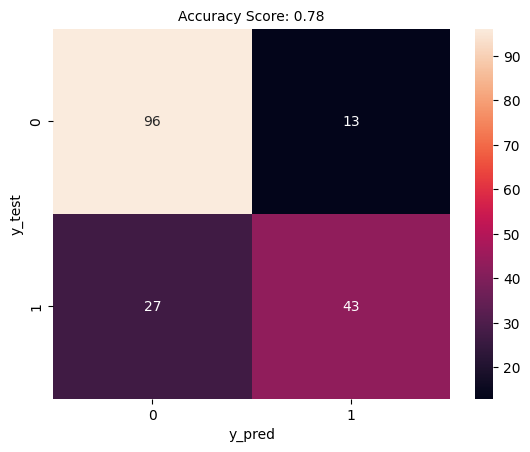

In [118]:
sns.heatmap(cm, annot = True, fmt = ".0f")

plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Accuracy Score: {0}".format(acc), size = 10)
plt.show()

- #### Accuracy score is okey but they are some breaking point about precision and recall. 

In [119]:
y_prob = lgbm_model.predict_proba(X_test)[:, 1]

In [120]:
roc_auc_score(y_test, y_prob)

0.8534076015727393

- #### AUC score look okey but wanted to see it in graph.

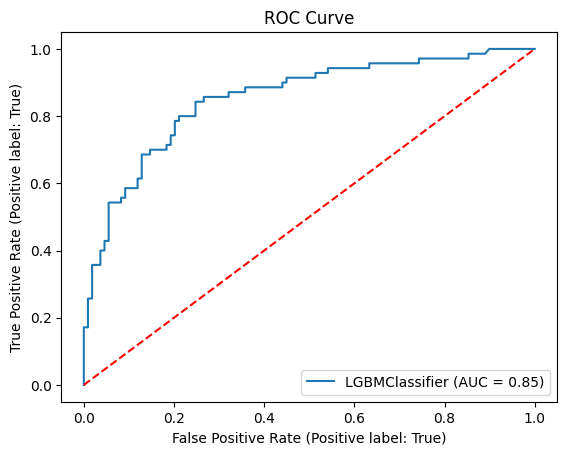

In [121]:
RocCurveDisplay.from_estimator(lgbm_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

- #### There were fluctuations in the estimates for different threshold values.
- #### Our curve did not fully cover the area. This means there is a better model.

In [122]:
from sklearn.model_selection import learning_curve

In [123]:
lgbm = LGBMClassifier()

In [124]:
X.shape

(891, 40)

In [125]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = lgbm,
    X = X,
    y = y,
    cv = 5,
    scoring = "accuracy",
    train_sizes = [1, 140, 280, 420, 712]
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 1
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 1, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

In [126]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

In [127]:
train_mean

array([1.        , 0.96285714, 0.97714286, 0.98190476, 0.98932584])

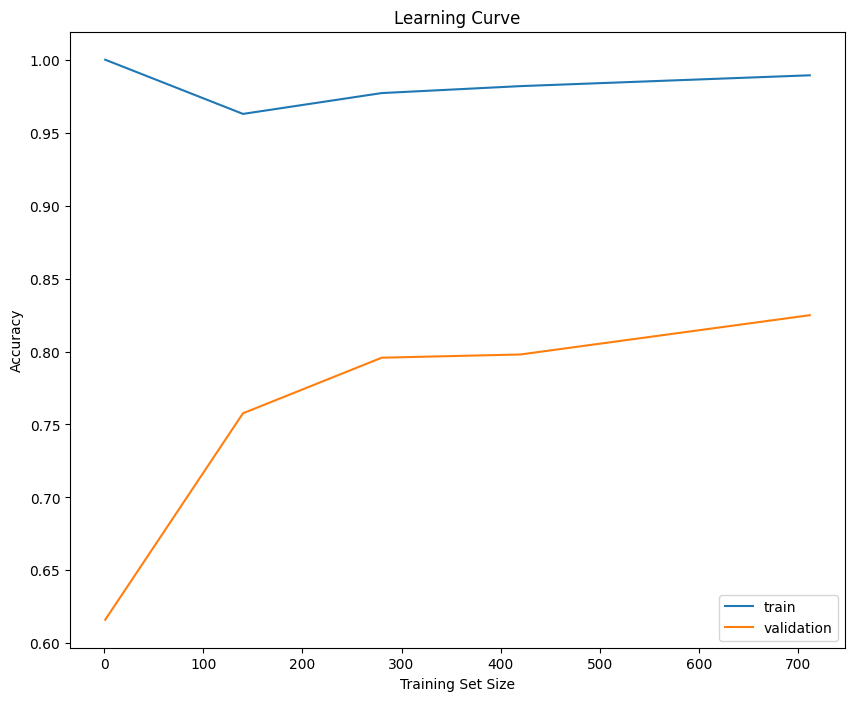

In [128]:
plt.subplots(figsize=(10,8))

plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")

plt.show()

- #### Increasing the training set size did not affect so much in train set and it was setted in higher scores.
- #### In the same time, the score of test set is increasing but its not enough to see the ending.
- #### With this view, it seems like model is overfitted. It has higher score in train set so it learnt everything in train set but when it tried to predict unseen data it did not do it proper but with increasing sample size it can meet in the middle with train set.

- #### Adding some data can show us more clean view if its not possible we can go through the hyperparameter optimization.
- #### Also, we can check learning_rate, n_estimators and colsample_bytree hyperparameters. They are directly affecting overfitting situations with optimizing gradient descent and tree structure.

## What about the features that we extracted?

In [129]:
feature_imp = pd.DataFrame({'Value': lgbm_model.feature_importances_, 'Feature': X.columns})

In [130]:
feature_imp.sort_values(by="Value", ascending = False)

,Value,Feature
1,796,FARE
2,491,NEW_NAME_COUNT
0,467,AGE
3,464,NEW_AGE_PCLASS
28,72,NEW_NAME_WORD_COUNT_4
6,70,EMBARKED_S
20,47,PCLASS_3
8,45,NEW_TITLE_Mr
4,43,SEX_male
27,31,NEW_CABIN_CHECK_1


- #### It seems like we made it and we did not make it :D
- #### Some variables which we created have top 10 feature importances but some classes have literally 0 feature importance.
- #### Also, we can try to drop these useless classes from encoded dataframe sturcture and check again the learning curve and scores may show us more clean view too.

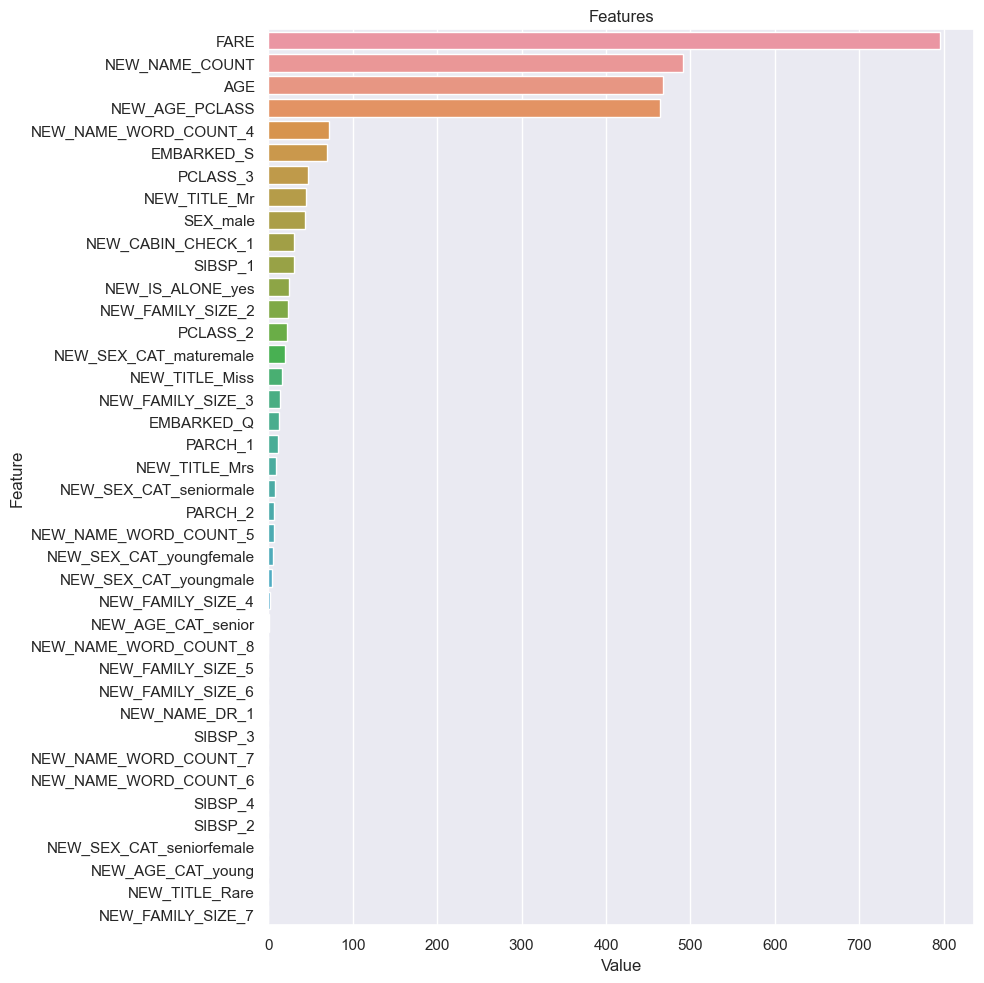

In [131]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:len(X)])
plt.title('Features')
plt.tight_layout()
plt.show()